# Uncorrelated Inhibition

Here we set the figures for the cases with only excitation in spines.

In [1]:
import numpy as np
from numpy.random import exponential, randint
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
plotose = True


import PS_lib as lb
import PS_storage as st

## Setting up the model

### Topology of the neuron

We set first a simplistic neuron

In [2]:
# Parameter definitions
# Data is stored here      
data = st.dataStorage() # some default parameters defined.
data.dt = 0.1
data.NMDA = False

# Definition of the model.
lb.h.dt = data.dt
NMDA = data.NMDA
model = lb.loadNeuron("Basic2.hoc",axon=False)
# Adding piece of dendritic branch with spine
model.addDend(name="DendE",locus="dendA1",L=4.0,D=1.5)
model.addSpne(locus="DendE",ilocus=0.5,L=1.0,D=1.0,Lneck=1.0,Dneck=0.15)
data.model = model.__dict__
# Temperature of the neuron
lb.h.celsius = model.temperature
print("Topology:")
print(lb.h.topology())

	0 
	1 
	1 
	1 
	1 
Topology:

|-|       soma(0-1)
   `|       dendA1c(0-1)
     `|       dendA1(0-1)
      `|       DendE(0-1)
       `|       NSpne000(0-1)
         `|       Spne000(0-1)
   `|       dendB1(0-1)

1.0


### Recording places

We set recording vectors in all dendritic compartments, spine included

In [3]:
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("talk",rc={"lines.linewidth": 2},font_scale=1.4)
#sinplot()
#seaborn.set_context('talk', rc={"lines.linewidth": 2},font_scale=1.4)

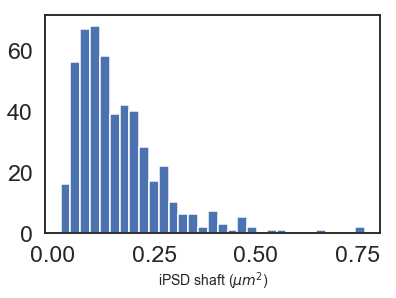

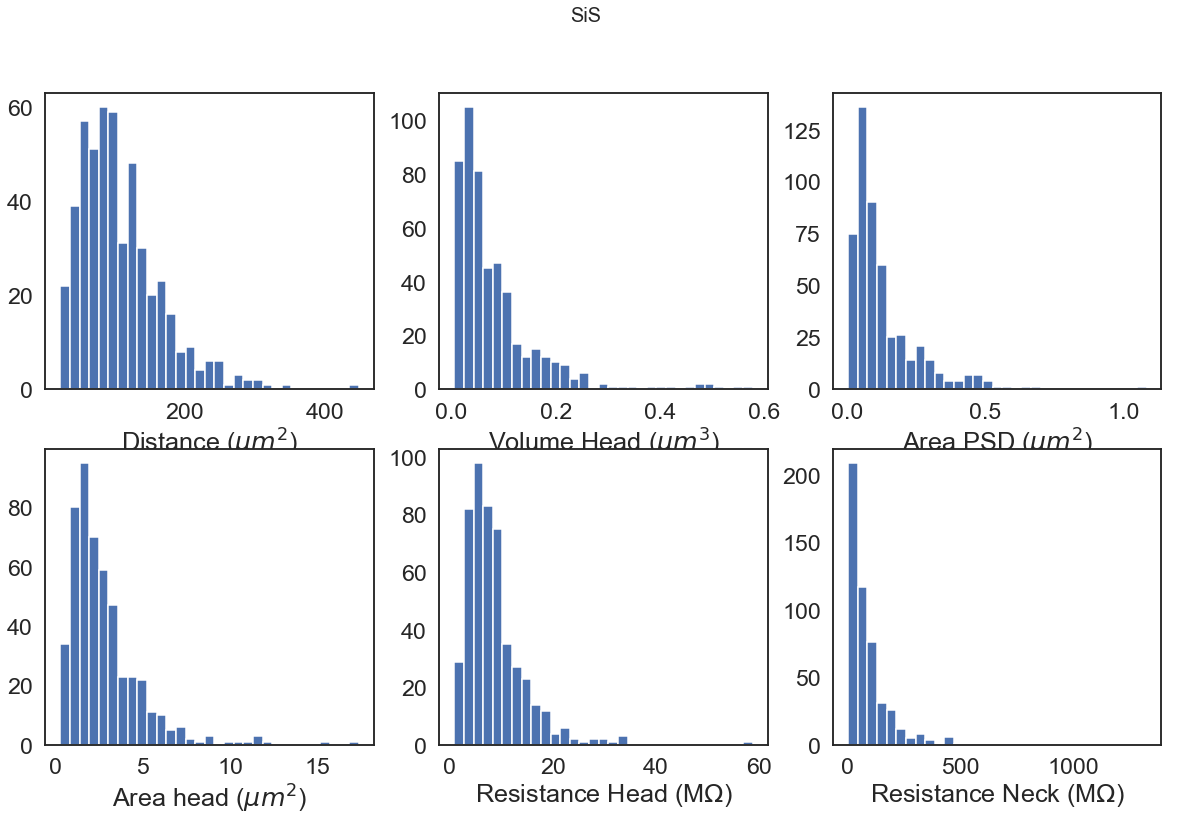

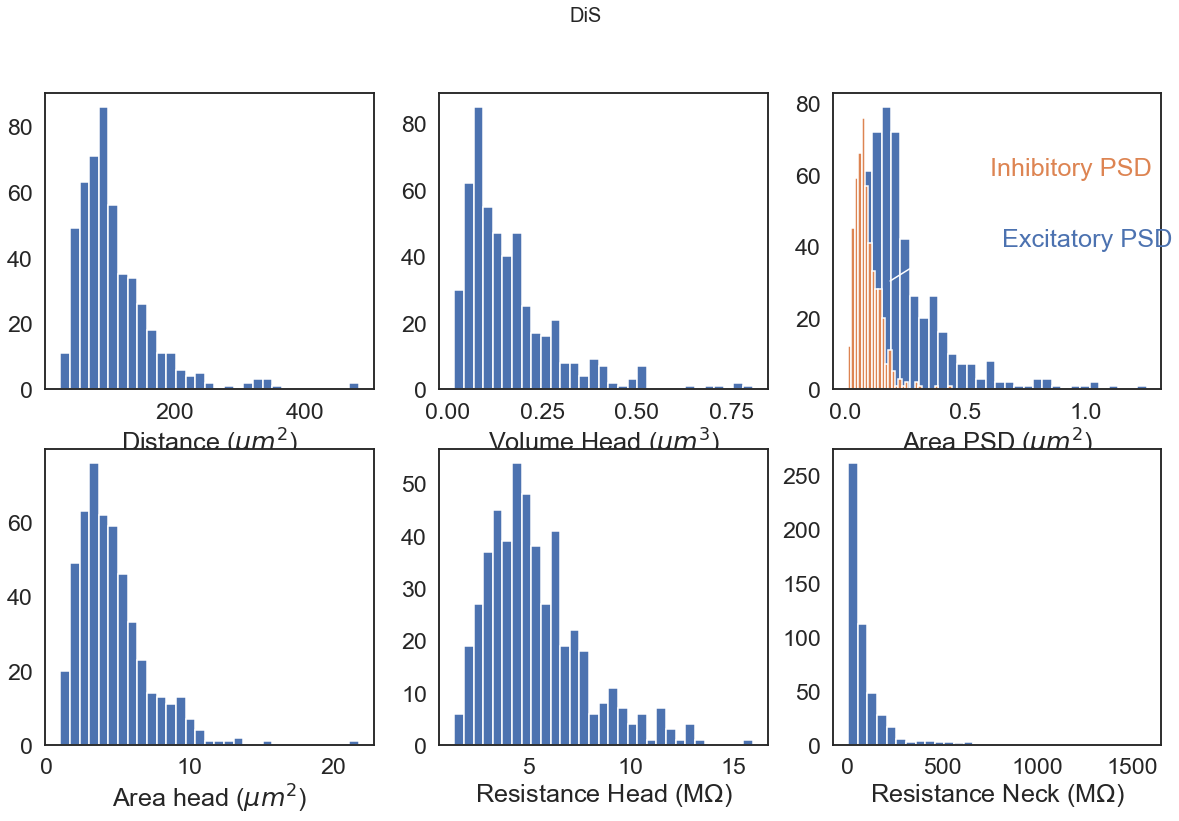

In [4]:
data = {
"inh shaft": (-2.01288, 0.606754),
"SiS": {
"Dss": (4.53309, 0.526501),
"Vh": (-2.84134 , 0.943684),
"A1": (-2.41469 , 0.880351),
"Ah": (0.87295, 0.664336),
"Rh":  (1.92772, 0.604723),
"Rn":(4.03436, 1.00208)
},
"DiS": {
"Dss": (4.56591 ,0.477682),
"Vh": (-2.0554,0.742202),
"A1": (-1.67118,0.63047),
"Ah": ( 1.42457,0.522589),
"Rh": (1.59667,0.436302),  
"Rn": (3.89941,1.13159),
"A2": ( -2.54262,0.531551)
},
}

labels = {
"Dss": "Distance ($\mu m^2$)",
"Vh": "Volume Head ($\mu m^3$)",
"A1": "Area PSD ($\mu m^2$)",
"A2": "Area inh PSD ($\mu m^2$)",
"Ah": "Area head ($\mu m^2$)",
"Rh": "Resistance Head (M$\Omega$)",  
"Rn": "Resistance Neck (M$\Omega$)"
}

nsp = 500

p = data["inh shaft"]
iPSDsh = exp(randn(nsp)*p[1]+p[0])
iPSDsh = exp(randn(nsp)*p[1]+p[0])
figure()
h = hist(iPSDsh,31)
xlabel("iPSD shaft ($\mu m^2$)",fontsize=14)
#savefig("D_iPSDsh.png",bbox_inches='tight',pad_inches = 0)
#figure(figsize=(18,12))
fig, ax = subplots(nrows=2,ncols=3,figsize=(20,12))
fig.suptitle("SiS",fontsize = 20)
#fig, ax = subplots(nrow=2,ncol=3)
dSiS = data["SiS"]
sis = {}
for i,key in enumerate(dSiS.keys()):
    p = dSiS[key]
    sis[key] = exp(randn(nsp)*p[1]+p[0])
    ax[i//3,i%3].hist(sis[key],31)
    ax[i//3,i%3].set_xlabel(labels[key])
    
#savefig("D_SiS_par.png",bbox_inches='tight',pad_inches = 0)
fig, ax = subplots(nrows=2,ncols=3,figsize=(20,12))
fig.suptitle("DiS",fontsize = 20)
#fig, ax = subplots(nrow=2,ncol=3)
dDiS = data["DiS"]
dis = {}
for i,key in enumerate(dDiS.keys()):
    p = dDiS[key]
    dis[key] = exp(randn(nsp)*p[1]+p[0])
    if key!='A2':
        ax[i//3,i%3].hist(dis[key],31)
        ax[i//3,i%3].set_xlabel(labels[key])

ax[0,2].hist(dis['A2'],31)
#ax[0,2].set_xlabel(labels[key])

ax[0,2].annotate(
    'Inhibitory PSD',
    xy=(.18, 30), arrowprops=dict(arrowstyle='-'), xytext=(0.6, 60),color='C1')

ax[0,2].annotate(
    'Excitatory PSD',
    xy=(.35, 30), arrowprops=dict(arrowstyle='-'), xytext=(0.65, 40),color='C0')

#savefig("D_DiS_par.png",bbox_inches='tight',pad_inches = 0)


sis["nsp"] = nsp
dis["nsp"] = nsp

Text(0.5, 0, 'I$_{max}$ (pA)')

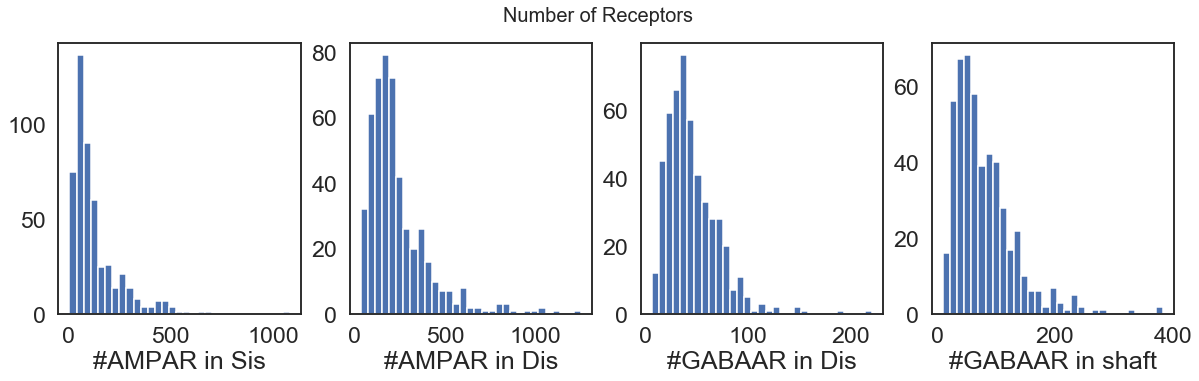

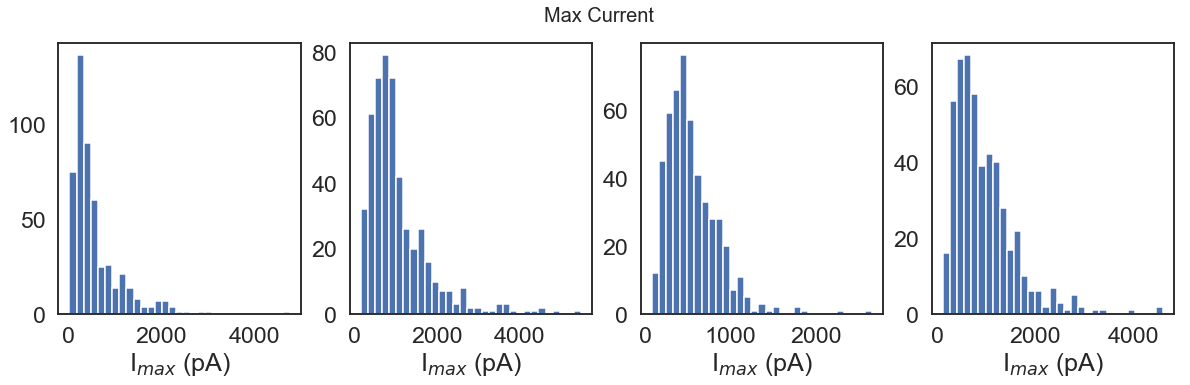

In [5]:
fig, ax = subplots(nrows=1,ncols=4,figsize=(20,5))
fig.suptitle("Number of Receptors",fontsize = 20)

rhGABAR = 500 # Receptors/um2
rhAMPAR = 1000 # Receptors/um2
rhNMDAR = 10 # Receptors/um2

dDiS = data["DiS"]

ax[0].hist(sis['A1']*rhAMPAR,31)
ax[0].set_xlabel("#AMPAR in Sis")
ax[1].hist(dis['A1']*rhAMPAR,31)
ax[1].set_xlabel("#AMPAR in Dis")
ax[2].hist(dis['A2']*rhGABAR,31)
ax[2].set_xlabel("#GABAAR in Dis")
ax[3].hist(iPSDsh*rhGABAR,31)
ax[3].set_xlabel("#GABAAR in shaft")
savefig("D_nRs.png",bbox_inches='tight',pad_inches = 0)

gtrG = rhGABAR*30e-6*2/5.0
gtrA = rhAMPAR*11e-6*2/5.0
gtrN = rhNMDAR*30e-6/16.0

fig, ax = subplots(nrows=1,ncols=4,figsize=(20,5))
fig.suptitle("Max Current",fontsize = 20)

dDiS = data["DiS"]

ax[0].hist(sis['A1']*gtrA/1e-6,31)
ax[0].set_xlabel("I$_{max}$ (pA)")
ax[1].hist(dis['A1']*gtrA/1e-6,31)
ax[1].set_xlabel("I$_{max}$ (pA)")
ax[2].hist(dis['A2']*gtrG/1e-6,31)
ax[2].set_xlabel("I$_{max}$ (pA)")
ax[3].hist(iPSDsh*gtrG/1e-6,31)
ax[3].set_xlabel("I$_{max}$ (pA)")
#savefig("D_maxI.png",bbox_inches='tight',pad_inches = 0)


In [6]:
from scipy.optimize import fsolve,newton
def fx(x,A,V):
    xx = pi*x[0]**2/4.0+2.0*pi*x[0]*x[1]-A
    yy = pi*x[0]**2*x[1]/4.0-V
    return(array([xx,yy]))

spn = dis
spn["D"] = zeros(nsp)
spn["L"] = zeros(nsp)
for i in arange(nsp):
    Ah = spn["Ah"][i]
    Vh = spn["Vh"][i]
    xm = sqrt(Ah/(pi*2.25))*.5+(Vh*4/pi)**(1./3.0)
    sol = fsolve(fx,[xm,xm],args=(Ah,Vh))
    D,L = sol
    spn["D"][i] = D
    spn["L"][i] = L
    

spn = sis
spn["D"] = zeros(nsp)
spn["L"] = zeros(nsp)
for i in arange(nsp):
    Ah = spn["Ah"][i]
    Vh = spn["Vh"][i]
    xm = sqrt(Ah/(pi*2.25))*.5+(Vh*4/pi)**(1./3.0)
    sol = fsolve(fx,[xm,xm],args=(Ah,Vh))
    D,L = sol
    spn["D"][i] = D
    spn["L"][i] = L

/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/export/home1/users/bssn/serna/environments/neuron/lib/python3.6/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


### Excitatory synapse 

We need to define the arrival time and dynamics. These parameters may be modified later

In [7]:
model.AMPAlist = []
model.ncAMPAlist = []

AMPA = lb.h.Exp2Syn(1,sec = model.spne[0])
tau1  = 0.5
tau2 = 8.0
AMPA.tau1 = tau1
AMPA.tau2 = tau2

nampa = 50
gmax = 15*nampa/1e6
stimE=lb.h.NetStim();stimE.number = 1; 
NC = lb.h.NetCon(stimE,AMPA,0,0,gmax)

model.AMPAlist.append(AMPA)
model.ncAMPAlist.append(NC)
NC.delay = 10

# NMDA part
nnmda = 2
gmaxN = 50*nnmda/1e6
lb.add_NMDAsyns(model, locs=[[0,0.5]], gmax=gmaxN,tau2=20.0)  
NMDA = model.NMDAlist[0]
NCN = model.ncNMDAlist[0]
stimN=lb.h.NetStim();stimN.number = 1;
NCN = lb.h.NetCon(stimN,NMDA,0,0,gmaxN)
model.ncNMDAlist[0] = NCN
NMDA.tau1 = 2.0
NMDA.tau2 = 30.0


### Inhibitory synapse

In [8]:
model.GABAlist = []
model.ncGABAlist = []
dendshaft = model.dend[1]
nGABA = 35
gmaxG = nGABA*30e-6
lb.add_GABAsynscomp(model, dendshaft, loc = 0.5, gmax=gmaxG,tau1=1.5,tau2=20.0)  
GABA = model.GABAlist[0]
NCG = model.ncGABAlist[0]
stimG=lb.h.NetStim();stimG.number = 1;
NCG = lb.h.NetCon(stimG,GABA,0,0,gmaxG)
model.ncGABAlist[0] = NCG

In [9]:
#lb.init_active(model,soma=False,dend=False,dendCa=False,spne=True,dendNa=False)
#CaTcond = 2000 # pS


In [10]:
trec, vrec = lb.h.Vector(), lb.h.Vector()
gRec, iRec,  vspneRec = [], [], []
gNMDA_rec, iNMDA_rec = [], []
trec.record(lb.h._ref_t)
vrec.record(model.soma(0.5)._ref_v)


#n=0
vDendRec = []
caDendRec = []
#For all dendrites
for dend in model.dend:
    #Adding vectors for Voltage, and Calcium
    vDendRec.append(lb.h.Vector())
    caDendRec.append(lb.h.Vector())
    # Placing recording at mid-point in the dendritic branch
    vDendRec[-1].record(dend(0.5)._ref_v)
    # NO CALCIUM!?!?!
#Probably better to organize them in a dictionary        

# Spine voltage recording stuff
vspneRec.append(lb.h.Vector())
vspneRec.append(lb.h.Vector())
sp = model.spne[0]
vspneRec[0].record(sp(0.5)._ref_v)
sp = model.neck[0]
vspneRec[1].record(sp(0.5)._ref_v)

# Calcim

caDendRec = []
sp = model.spne[0]
caDendRec.append(lb.h.Vector())
caDendRec.append(lb.h.Vector())
caDendRec.append(lb.h.Vector())
caDendRec[0].record(sp(0.5)._ref_ica) 
caDendRec[1].record(model.NMDAlist[0]._ref_i)
caDendRec[2].record(sp(1.0)._ref_cai) 


Vector[14]

In [11]:
neck = model.neck[0]
Rneck = neck.L*1e-6/(neck.diam*1e-6/2.0)**2/pi*neck.Ra/100
dend = model.dend[0]
dend.L = 3
dend.diam = 1.5
print(dend.L,dend.diam)
Rdend = dend.L*1e-6/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
Rdendf = Rdend
dend = model.dend[1]
dend.diam = 0.7
print(dend.L,dend.diam,Rdend/1e6)
Rdend +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
dend = model.dend[-1]
dend.diam = 0.5
print(dend.L,dend.diam,Rdend/1e6)
Rdend +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
Rdendf +=dend.L*1e-6/2.0/(dend.diam*1e-6/2.0)**2/pi*dend.Ra/100
print("The resistance of neck and the dendritic impedance are %.2f and %2.f MΩ (resp.)" %(Rneck/1e6,Rdend/1e6))

3.0 1.5
200.24984394500785 0.6999999880790709 4.244131815783876
4.0 0.5 654.6676747288462
The resistance of neck and the dendritic impedance are 141.47 and 680 MΩ (resp.)


In [12]:
model.soma.diam

29.78380012512207

In [13]:
lb.init_active(model, axon=False, soma=False, dend=False, dendNa=False,
                dendCa=False,spne=True)

## Plots

xkcd is to give it non serious appearance

In [14]:
def delinh(tG,spn,EL = -65,toffset = 50):
    ''' tG: delay of inhibition 
        spn: dictionary with spines properties
    '''
    model.E_PAS = EL
    model.soma.e_pas = EL
    for dendp in model.dend:
        dendp.e_pas = EL
    for sp in model.spne:
        sp.e_pas = EL

    ton = 50
    t_stop = 250
    nsp = spn["nsp"]
    
    mes = zeros((nsp,6))
    vtracs = zeros((int(t_stop/lb.h.dt+1),500))
    Ctracs = zeros((int(t_stop/lb.h.dt+1),500))
    for i in arange(nsp):   
        NC.weight[0] = spn["A1"][i] *gtrA#/2
        NCN.weight[0] = spn["A1"][i] *gtrN
        NCG.weight[0] = iPSDsh[i] *gtrG


        neck.Ra = spn["Rn"][i]/Rneck
        #neck.L = 1.5
        #Rneckt = Rneck*Ra/250
        dend.L = spn["Dss"][i]*2
        sp = model.spne[0]
        # A = pi*D**2
        sp.L =  spn["D"][i]
        sp.diam = spn["L"][i]

        NC.delay = toffset+ton-50
        NCN.delay = toffset+ton-50
        NCG.delay = toffset+tG#-50

        # ~ print(NC.weight[0])
        lb.h.finitialize(model.E_PAS)
        # ~ print(NC.weight[0])

        lb.neuron.run(t_stop)

        #plot(trec,vspneRec[0])    

        current = abs((array(vDendRec[-2])-array(vDendRec[0]))/Rdend)

        vtracs[:,i] = array(vspneRec[0]) 
        
        cat = array(caDendRec[-1])/1e-3

        Ctracs[:,i] = cat-cat[0] 

        mes[i,:] = [nampa,max(vspneRec[0])-EL,max(vDendRec[1])-EL,max(vrec)-EL,max(cat)-cat[0],max(current)]
    
    vtracso = vtracs*1.0
    vtracso.sort(axis=1)
    vmed = vtracso[:,250]-EL
    v2s = column_stack((vtracso[:,5]-EL,vtracso[:,495]-EL))
    v1s = column_stack((vtracso[:,79]-EL,vtracso[:,421]-EL))
    Ctracso = Ctracs*1.0
    Ctracso.sort(axis=1)
    Cmed = Ctracso[:,250]
    C2s = column_stack((Ctracso[:,5],vtracso[:,495]))
    C1s = column_stack((Ctracso[:,79],vtracso[:,421]))

    vs = column_stack((vmed,v1s,v2s,vtracs.mean(axis=1)))
    Cs = column_stack((Cmed,C1s,C2s,Ctracs.mean(axis=1)))

    return(vs,mes,Cs)


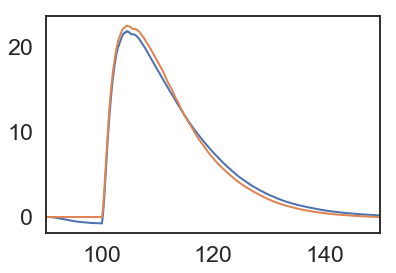

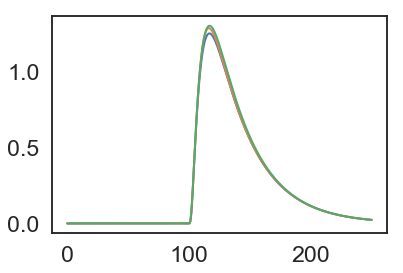

In [15]:
vm0,mes0,C1 = delinh(-10,dis)
plot(trec,vm0[:,0])
vm0,mes0,C2 = delinh(10,dis)
plot(trec,vm0[:,0])
vm0,mes0,C3 = delinh(200,dis)

xlim(90,150)
figure()
plot(trec,C1[:,-1])
plot(trec,C2[:,-1])
plot(trec,C3[:,-1])

In [16]:
vaF = {}
meF = {}

In [17]:
dend.Ra = 250
neck.Ra = 250
model.E_PAS = -65
model.soma.e_pas = model.E_PAS
for dendp in model.dend:
    dendp.e_pas = model.E_PAS
for sp in model.spne:
    sp.e_pas = model.E_PAS


ton = 50
tG = ton-10
t_stop = 200
toffset = 50
t_stop = 250

vm0,mes0,C0 = delinh(100,dis)

tdels = 100*random(100)-50.0

mes = zeros((len(tdels),6))
me2 = zeros((len(tdels),10))

for i,tG in enumerate(tdels):
    #lb.add_somaStim(model,p=0.5,onset=ton,dur=2, amp =0.0)
    
    vm,mest,Cs = delinh(tG,dis)
    
    mes[i,:] = mest.mean(axis=0)
    mest0 = mest[:,1:]/mes0[:,1:]
    me2[i,:] = concatenate((mest0.mean(axis=0),mest0.std(axis=0)))
    if i%10 == 0: print(i)


0
10
20
30
40
50
60
70
80
90


In [19]:
medata = 1.0*mes
medata0 = 1.0*mes0
medata2 = 1.0*me2

Text(0.5, 0, '$R_{neck}$')

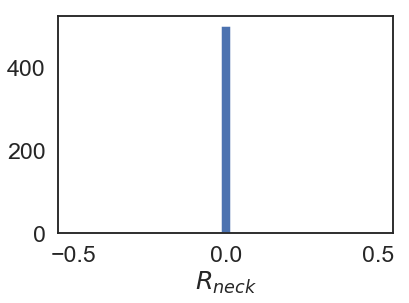

In [20]:
figure()
hist(mest[:,0]/1e6,31)
xlabel("$R_{neck}$")

In [22]:
me2.shape
sel = me2[:,0]<2.0
(me2[sel,:].mean(axis=0))[array([0,3,0+5,3+5])]

array([0.98764394, 0.98177326, 0.01205369, 0.01266419])